In [1]:
# Import Libraries and Read Dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
car_eval = pd.read_csv('car_evaluation.csv')
car_eval.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
#Dimension of Dataset
car_eval.shape

(1727, 7)

In [4]:
#Renaming Column names 

col_names = ['buying', 'maint', 'doors', 'persons', 'luggage', 'safety', 'class']

car_eval.columns = col_names

col_names

car_eval.head()

,buying,maint,doors,persons,luggage,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
#Check for Incomplete or Null or error Values in the DataSet DATA WRANGLING

car_eval.isnull()

,buying,maint,doors,persons,luggage,safety,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


In [6]:
car_eval.describe()


,buying,maint,doors,persons,luggage,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [7]:
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   buying   1727 non-null   object
 1   maint    1727 non-null   object
 2   doors    1727 non-null   object
 3   persons  1727 non-null   object
 4   luggage  1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'luggage', 'safety', 'class']

for col in col_names:
    
    print(car_eval[col].value_counts())   
#Persons and Doors are considered as Categorical Variables

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: luggage, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
car_eval.isnull().sum()

buying     0
maint      0
doors      0
persons    0
luggage    0
safety     0
class      0
dtype: int64

In [10]:
#Assigning Target Variable & 
X = car_eval.drop(['class'], axis=1)

y = car_eval['class']

In [11]:
print(X)
print(y)

     buying  maint  doors persons luggage safety
0     vhigh  vhigh      2       2   small    med
1     vhigh  vhigh      2       2   small   high
2     vhigh  vhigh      2       2     med    low
3     vhigh  vhigh      2       2     med    med
4     vhigh  vhigh      2       2     med   high
...     ...    ...    ...     ...     ...    ...
1722    low    low  5more    more     med    med
1723    low    low  5more    more     med   high
1724    low    low  5more    more     big    low
1725    low    low  5more    more     big    med
1726    low    low  5more    more     big   high

[1727 rows x 6 columns]
0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object


In [12]:
# Spliting entire dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 55)

In [13]:
#Check Dataset and Trainset

X_train.shape, X_test.shape

((863, 6), (864, 6))

In [14]:
#converting ordinal data to categorical datatype
""""from encoders import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'luggage', 'safety', 'class'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head() """


X_train = pd.get_dummies(X_train,columns=['buying', 'maint', 'doors', 'persons', 'luggage', 'safety'])

X_test = pd.get_dummies(X_test,columns=['buying', 'maint', 'doors', 'persons', 'luggage', 'safety'])

In [15]:
#Check

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 1053 to 461
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   buying_high    863 non-null    uint8
 1   buying_low     863 non-null    uint8
 2   buying_med     863 non-null    uint8
 3   buying_vhigh   863 non-null    uint8
 4   maint_high     863 non-null    uint8
 5   maint_low      863 non-null    uint8
 6   maint_med      863 non-null    uint8
 7   maint_vhigh    863 non-null    uint8
 8   doors_2        863 non-null    uint8
 9   doors_3        863 non-null    uint8
 10  doors_4        863 non-null    uint8
 11  doors_5more    863 non-null    uint8
 12  persons_2      863 non-null    uint8
 13  persons_4      863 non-null    uint8
 14  persons_more   863 non-null    uint8
 15  luggage_big    863 non-null    uint8
 16  luggage_med    863 non-null    uint8
 17  luggage_small  863 non-null    uint8
 18  safety_high    863 non-null    uint8
 19  safet

In [16]:
#Check
X_test.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,luggage_big,luggage_med,luggage_small,safety_high,safety_low,safety_med
1214,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
742,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0
1375,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
898,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
399,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [17]:
X_test.shape

(864, 21)

In [18]:
X_train.shape

(863, 21)

In [19]:
#Calling Decision Tree Classifier
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [20]:
#Classifiying based on Gini-Index

c_gini = DecisionTreeClassifier(criterion ='gini' , random_state=0)

In [21]:
# Fit the above Model to Training Dataset

c_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
#Predicting values of Y based on Gini Index X_test Dataset

gini_pred_y = c_gini.predict(X_test)

In [23]:
#Getting accuracy

from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test,gini_pred_y)

print(ac)

0.9537037037037037


In [24]:
# Get Accuracy of Trainset over Predicted

gini_pred_y_train = c_gini.predict(X_train)

In [25]:
#Getting Accuracy

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, gini_pred_y_train)

print(acc_train)

1.0


[Text(0.8213315217391305, 0.9642857142857143, 'X[19] <= 0.5\ngini = 0.469\nsamples = 863\nvalue = [198, 39, 595, 31]'),
 Text(0.806838768115942, 0.8928571428571429, 'X[12] <= 0.5\ngini = 0.591\nsamples = 569\nvalue = [198, 39, 301, 31]'),
 Text(0.7923460144927537, 0.8214285714285714, 'X[3] <= 0.5\ngini = 0.627\nsamples = 386\nvalue = [198, 39, 118, 31]'),
 Text(0.613677536231884, 0.75, 'X[17] <= 0.5\ngini = 0.621\nsamples = 296\nvalue = [164, 39, 62, 31]'),
 Text(0.41938405797101447, 0.6785714285714286, 'X[1] <= 0.5\ngini = 0.585\nsamples = 198\nvalue = [119, 26, 22, 31]'),
 Text(0.26992753623188404, 0.6071428571428571, 'X[7] <= 0.5\ngini = 0.461\nsamples = 128\nvalue = [91, 8, 20, 9]'),
 Text(0.16304347826086957, 0.5357142857142857, 'X[5] <= 0.5\ngini = 0.402\nsamples = 96\nvalue = [73, 8, 6, 9]'),
 Text(0.07246376811594203, 0.4642857142857143, 'X[8] <= 0.5\ngini = 0.248\nsamples = 65\nvalue = [56, 0, 4, 5]'),
 Text(0.028985507246376812, 0.39285714285714285, 'X[6] <= 0.5\ngini = 0.18\

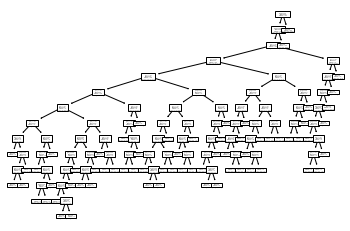

In [26]:
#Visualization

from sklearn import tree

tree.plot_tree(c_gini.fit(X_train,y_train))

In [33]:
sns.barplot(x=y_train,y=gini_pred_y_train,data=car_eval,color='blue',hue='safety')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

DecisionTreeClassifier(criterion='entropy', random_state=0)

array(['unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc',
       'unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood',
       'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'vgood', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood',
       'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'vgood', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
